<a href="https://colab.research.google.com/github/ndoshi83/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/NDoshi_DS4_Unit_1_Sprint_Challenge_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [0]:
# TODO
# Import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
%matplotlib inline

In [0]:
# Load data into dataframe
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data'
col_names = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','A16']
crx = pd.read_csv(url, names=col_names)

# Review loaded data
print(crx.shape)
crx.head()

(690, 16)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [0]:
# Check data for missing values
# Replace ? with null value
crx = crx.replace({'?':np.NaN})

# Count the null values
crx.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [0]:
# Verify data types for features
crx.dtypes

A1      object
A2      object
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14     object
A15      int64
A16     object
dtype: object

In [0]:
# Convert continuous columns from object to float
crx['A2'] = crx['A2'].astype(float)
crx['A11'] = crx['A11'].astype(float)
crx['A14'] = crx['A14'].astype(float)
crx['A15'] = crx['A15'].astype(float)

In [0]:
# Show updated datatypes for the continuous variables
crx.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11    float64
A12     object
A13     object
A14    float64
A15    float64
A16     object
dtype: object

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [0]:
# TODO
# Explore the data by looking at numerical features
crx.describe()

,A2,A3,A8,A11,A14,A15
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


In [0]:
# Explore the categorical features
crx.describe(exclude='float')

,A1,A4,A5,A6,A7,A9,A10,A12,A13,A16
count,678,684,684,681,681,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,2
top,b,u,g,c,v,t,f,f,g,-
freq,468,519,519,137,399,361,395,374,625,383


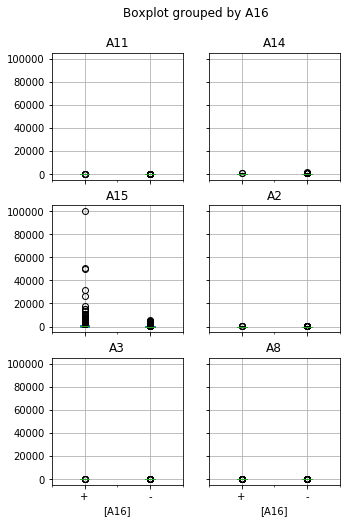

In [0]:
# Use a boxplot to get initial idea
crx.boxplot(by='A16', figsize=(5,8));

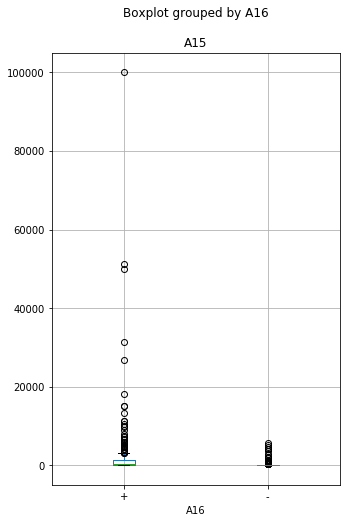

In [0]:
# Take a closer look at A15
crx.boxplot(by='A16', column='A15', figsize=(5,8));

In [0]:
# Create 2 dataframes to break out the A16 class
crx_p = crx[crx['A16'] == '+']
crx_n = crx[crx['A16'] == '-']

print(crx_p.shape)
print(crx_p.head())
print(crx_n.shape)
print(crx_n.head())

(307, 16)
  A1     A2     A3 A4 A5 A6 A7    A8 A9 A10  A11 A12 A13    A14    A15 A16
0  b  30.83  0.000  u  g  w  v  1.25  t   t  1.0   f   g  202.0    0.0   +
1  a  58.67  4.460  u  g  q  h  3.04  t   t  6.0   f   g   43.0  560.0   +
2  a  24.50  0.500  u  g  q  h  1.50  t   f  0.0   f   g  280.0  824.0   +
3  b  27.83  1.540  u  g  w  v  3.75  t   t  5.0   t   g  100.0    3.0   +
4  b  20.17  5.625  u  g  w  v  1.71  t   f  0.0   f   s  120.0    0.0   +
(383, 16)
   A1     A2   A3 A4 A5  A6  A7      A8 A9 A10  A11 A12 A13    A14  A15 A16
70  b  32.33  7.5  u  g   e  bb   1.585  t   f  0.0   t   s  420.0  0.0   -
71  b  34.83  4.0  u  g   d  bb  12.500  t   f  0.0   t   g    NaN  0.0   -
72  a  38.58  5.0  u  g  cc   v  13.500  t   f  0.0   t   g  980.0  0.0   -
73  b  44.25  0.5  u  g   m   v  10.750  t   f  0.0   f   s  400.0  0.0   -
74  b  44.83  7.0  y  p   c   v   1.625  f   f  0.0   f   g  160.0  2.0   -


In [0]:
# Perform T-tests on the 6 continuous variables to see the significance
# Create list of continuous variable names
con_var = ['A2','A3','A8','A11','A14','A15']

# Perform t-test on 2 groups
for x in con_var:
    print(x, "\n", sts.ttest_ind(crx_p[x], crx_n[x], nan_policy='omit'))

A2 
 Ttest_indResult(statistic=4.2922156166315535, pvalue=2.0276637071781407e-05)
A3 
 Ttest_indResult(statistic=5.52998337614816, pvalue=4.551680702308068e-08)
A8 
 Ttest_indResult(statistic=8.935819983773698, pvalue=3.6710537401601785e-18)
A11 
 Ttest_indResult(statistic=11.667004222431277, pvalue=7.957718568079967e-29)
A14 
 Ttest_indResult(statistic=-2.6358251986645476, pvalue=0.008586135473979569)
A15 
 Ttest_indResult(statistic=4.680216020964486, pvalue=3.4520256956287944e-06)


In [0]:
# Look at the categorical variables
# Create contingency tables on categorical variables A9 and A13

A9_Cont_Tab = pd.crosstab(crx['A16'], crx['A9'])
print(A9_Cont_Tab)

A13_Cont_Tab = pd.crosstab(crx['A16'], crx['A13'])
print(A13_Cont_Tab)


A9     f    t
A16          
+     23  284
-    306   77
A13    g  p   s
A16            
+    287  5  15
-    338  3  42


In [0]:
# Perform Chi2 test on 2 variables selected above
# First will be A9 variable
chi_squared, p_value, dof, expected = sts.chi2_contingency(A9_Cont_Tab)

print(f"Chi-Squared: {chi_squared}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected: \n", np.array(expected))

Chi-Squared: 355.2038167412799
P-Value: 3.1185900878457007e-79
Degrees of Freedom: 1
Expected: 
 [[146.38115942 160.61884058]
 [182.61884058 200.38115942]]


In [0]:
# Now will be A13 variable
chi_squared, p_value, dof, expected = sts.chi2_contingency(A13_Cont_Tab)

print(f"Chi-Squared: {chi_squared}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected: \n", np.array(expected))

Chi-Squared: 9.191570451545383
P-Value: 0.010094291370456362
Degrees of Freedom: 2
Expected: 
 [[278.07971014   3.55942029  25.36086957]
 [346.92028986   4.44057971  31.63913043]]


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

*Your words here!*

So instead of trying to guess which 2 continuous variables to run the T-test on, I ran the T-test on all 6 variables. Based on these tests, A11 showed to have the most extreme difference when looking at the class for positive oe negative credit decision. At the same time, A14 had the least difference, though this variable did lean in favor of the negative decision. 

For the categorial variables, I did chose 2 variables to run Chi-squared tests on based on the completeness of data and the variance in which way the variables broke down in terms of positive and negative (see contingency tables above). Based on the testing results, A9 is more extreme and the null hypothesis is rejected. Whereas A13 variable is not extreme but still the null hypothesis is rejected and the variable does associate with the class variable in determining positive or negative credit status.

The most challenging part of this challenge was to determine which catergorical variables to use and also if I should try to test all of them. Due to time constriants I decided to pick 2 based on the explanation above and forgoe testing all of them. 